## Problem set 4.2 Linear Algebra 5th Edition by Strang

In [268]:
#in 1-D case, 
#makes use of p = x*a;
#x = aTb/aTa
#whereas projection matrix P = aaT/aTa
#so that Pb = projection of b onto a 

In [51]:
import numpy as np
from math import acos,degrees

import matplotlib.pyplot as plt 

In [48]:
def getProjMat(a):
    aat = np.outer(a,a)
    ata = np.dot(a,a)
    bigp = aat/ata
    return bigp

def get1dProjection(b,a, *doPrintProj):
    if (type(a) is not np.ndarray):
        a = np.array(a)
    if (type(b) is not np.ndarray):
        b = np.array(b)    
        
    ata = np.dot(a,a)
    atb = np.dot(a,b)
    x = atb/ata
    littlep = x*a
    
    if doPrintProj:
        print(littlep)
    e = b-littlep
    eta = np.dot(e,a)
    
    if eta > 1e-15:
        print(eta)
        raise Exception('a is somehow not orthogonal to e')
    else:
        print('a is indeed orthogonal to e. yay!')

    if np.array_equal(littlep,b):
        theta = getTheta(a,b)
        if np.isin(theta,[0, 180]):
            print('the two vectors are collinear (angle is 0 or 180 deg). projection did not change the input')
        
    return littlep

def getTheta(a,b):
    theta = math.degrees(math.acos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b))))
    return theta

def checkP2(projmat):
    if np.allclose(projmat, projmat@projmat,1e-10000000):
        print('all good, P=P^2 (by a tiny tolerance)')
    else:
        print('not a projection matrix, P=/=P^2')
        print(projmat)
        print(projmat@projmat)
        
def getAmat(*avecs):
    Amat = np.column_stack(avecs)
    if np.shape(Amat)[0] != np.prod(np.shape(avecs[0])):
        raise Exception('concatenation failed')
    else:
        return Amat

In [134]:
def getNdProjMat(A):
    #find basis for A
#    basis = getBasis(A)
    projMat = A@(np.linalg.inv(A.T@(A)))@(A.T) #A(ATA)-1(AT)
    if np.unique(np.shape(A)).size == 1 & np.allclose(projMat, np.identity(np.shape(A)[0])):
        print('projection matrix is I, A is invertible so full rank, so projection stays in full dimensional space')
    return projMat


def getBasis(A):
    
    #row reduction??
    return basis

In [11]:
#project b onto a
a = np.array([1,1,1]) 
b = np.array([1,2,2])

In [21]:
#get their respective inner products (both just a number)
ata = np.dot(a,a) 
atb = np.dot(a,b) #angle between a and b, proj = 0 if atb = 0 i.e. if a and b are orthogonal

In [22]:
x = atb/ata #multiple of a (i.e. the length of the projected line)
x

1.6666666666666667

In [23]:
p = x*a #scale a by the multiple in order to get the actual point closest to a
p

array([1.66666667, 1.66666667, 1.66666667])

In [24]:
e = b-p #vector of projection of b onto a
e

array([-0.66666667,  0.33333333,  0.33333333])

In [35]:
#check that eTa is 0 (i.e. they are orthogonal, as they should always be)
eta = np.dot(e,a)
eta < 1e-100 #level of tolerance, computer precision too good..

True

In [113]:
b = [1,2,2]
a = [1,1,1]
proj, projmat = get1dProjection(b,a,True)


[1.66666667 1.66666667 1.66666667]
a is indeed orthogonal to e. yay!


In [146]:
b = [1,3,1]
a = [-1,-3,-1]
proj, projmat = get1dProjection(b,a)

a is indeed orthogonal to e. yay!
the two vectors are collinear (angle is 0 or 180 deg). projection did not change the input


In [147]:
b1 = [1,2,2]
a1 = [1,1,1]
foo, bigp1 = get1dProjection(b1,a1)
b2 = [1,3,1]
a2 = [-1,-3,-1]
foo, bigp2 = get1dProjection(b2,a2)

a is indeed orthogonal to e. yay!
a is indeed orthogonal to e. yay!
the two vectors are collinear (angle is 0 or 180 deg). projection did not change the input


In [148]:
pplusp = bigp1+bigp2
checkP2(pplusp)

not a projection matrix, P=/=P^2
[[0.42424242 0.60606061 0.42424242]
 [0.60606061 1.15151515 0.60606061]
 [0.42424242 0.60606061 0.42424242]]
[[0.72727273 1.21212121 0.72727273]
 [1.21212121 2.06060606 1.21212121]
 [0.72727273 1.21212121 0.72727273]]


In [162]:
a1 = [-1,2,2]
foo, bigp1 = get1dProjection(b1,a1)

NameError: name 'get1dProjection' is not defined

In [4]:
a = [1,2,1]
b = [1,1,1]

In [185]:
a1 = [-1, 2, 2]
bigp1 = getProjMat(a1)

In [186]:
a2 = [2,2,-1]
bigp2 = getProjMat(a2)

In [197]:
if np.allclose(bigp1@bigp2, np.zeros(np.shape(bigp1))):
    print('P1*P2 = zero matrix')
if np.isclose(np.dot(a1,a2),0):
    print('inputs are orthogonal')

P1*P2 = zero matrix
inputs are orthogonal


In [203]:
b = [1,0,0]
p1 = get1dProjection(b,a1)
p2 = get1dProjection(b,a2)
a3 = [2,-1,2]
p3 = get1dProjection(b,a3)

a is indeed orthogonal to e. yay!
a is indeed orthogonal to e. yay!
a is indeed orthogonal to e. yay!


In [223]:
print(p1)
print(p2)
print(p3)

if np.allclose(b,p1+p2+p3):
    print('chain of projections returned to original vector')

[ 0.11111111 -0.22222222 -0.22222222]
[ 0.44444444  0.44444444 -0.22222222]
[ 0.44444444 -0.22222222  0.44444444]
chain of projections returned to original vector


In [209]:
bigp3 = getProjMat(a3)

In [224]:
if np.allclose(bigp1+bigp2+bigp3,np.identity(np.shape(bigp3)[0])):
    print('sum of projection matrices is the identity')

sum of projection matrices is the identity


In [232]:
if np.dot(a1,a2) == np.dot(a2,a3) == np.dot(a1,a3) == 0:
    print('these three vectors are pairwise perpendicular')
    
getAmat(a1,a2,a3)

these three vectors are pairwise perpendicular


array([[-1,  2,  2],
       [ 2,  2, -1],
       [ 2, -1,  2]])

In [248]:
b = [1,1]
a1 = [1,0]
p1 = get1dProjection(b,a1)

a is indeed orthogonal to e. yay!


In [249]:
a2 = [1,2]
p2 = get1dProjection(b,a2)

a is indeed orthogonal to e. yay!


In [264]:
if not np.allclose(p1+p2,b): 
    print('sum of projections on b do not return to b (as expected in this problem)')

sum of projections on b do not return to b (as expected in this problem)


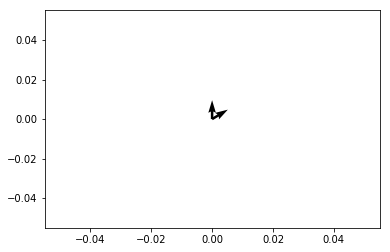

In [254]:
origin = [0], [0] # origin point
plt.quiver(*origin, p1,p2)
plt.show()

In [266]:
theta = getTheta(a1,a2) #angle between a1 and a2 - they are not orthogonal 
if np.dot(a1,a2)!= 0 & ~np.isclose(theta,90):
    print('vectors are not orthogonal (as expected in this problem)')

vectors are not orthogonal (as expected in this problem)


In [28]:
getProjMat(a2)*a1

array([[0.2, 0. ],
       [0.4, 0. ]])

In [75]:
a1 = [1,0]
a2 = [1,2]
a1ona2 = get1dProjection(a1,a2)
a2ona1ona2 = get1dProjection(a1ona2,a1)


a is indeed orthogonal to e. yay!
a is indeed orthogonal to e. yay!


array([0.2, 0. ])

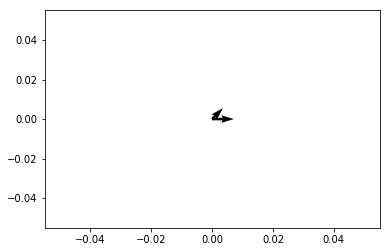

In [67]:
origin = [0], [0] # origin point
plt.quiver(*origin, a1ona2,a2ona1ona2)
plt.show()

In [114]:
p1 = getProjMat(a1)
p2 = getProjMat(a2)
print(p1)
print(p2)
print((p1@p2)@np.array(a1))


[[1. 0.]
 [0. 0.]]
[[0.2 0.4]
 [0.4 0.8]]
[0.2 0. ]


In [135]:
#first use A = getAmat(a1,...) to join basis vectors into a matrix
a1 = [1,0]
a2 = [1,2]
A = getAmat(a1,a2)
bigp = getNdProjMat(A)

projection matrix is I, A is invertible so full rank, so projection stays in full dimensional space


In [123]:
A@(np.linalg.inv(A.T@(A)))@(A.T)

array([[1., 0.],
       [0., 1.]])

In [ ]:
projMat = A@(np.linalg.inv(A.T@(A)))@(A.T)

In [179]:
#question 11a (p. 216)
b = [2,3,4]
A = np.array(np.mat('1 1; 0 1; 0 0'))
projMat1 = getNdProjMat(A)
proj = projMat1@b
print(proj) #correct! (2,3,0)
e = b-proj
print(e) #correct (0,0,4)

[2. 3. 0.]
[0. 0. 4.]


In [177]:
#11b
b = [4,4,6]
A = np.array([[1,1],[1,1],[0,1]])
projMat2 = getNdProjMat(A)
proj = projMat2@b
print(proj) #correct! (4,4,6)
e = b-proj
print(e) #correct (0,0,0) #result is full rank, so null space (e, orth to basis spanned by A) is just zero vector? 

[4. 4. 6.]
[0. 0. 0.]


In [183]:
print(projMat1)
print(projMat2)
checkP2(projMat2)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
[[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [0.  0.  1. ]]
all good, P=P^2 (by a tiny tolerance)


In [189]:
A = getAmat([1,1,0], [2,0,1])
projMat = getNdProjMat(A)[0]
print(projMat) #seems right

[[ 0.83333333  0.16666667  0.33333333]
 [ 0.16666667  0.83333333 -0.33333333]
 [ 0.33333333 -0.33333333  0.33333333]]


In [198]:
#instead of bothering with the column space of A, get the left null space, i.e. literally ATx = 0, so the actual AT,
#then get the identity matrix from P = I-Q. magic! 
Q = getProjMat([1, -1, 2])
print(Q) #seems right
P = np.identity(np.shape(projMat)[0]) - Q #seems right

[[ 0.16666667 -0.16666667  0.33333333]
 [-0.16666667  0.16666667 -0.33333333]
 [ 0.33333333 -0.33333333  0.66666667]]
